# Шаг 6. Проверка гипотез

### Импорт необходимых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels as sts 

import seaborn as sns
import numpy as np

## Импорт датафрейма

In [2]:
df = pd.read_csv('data/df_after_step05.csv', index_col=0)
df

,usdrub,gold,cb_key_rate,fed_rate,imoex_open,imoex_close,ru_cpi,us_cpi,workday,first_workday,second_workday,imoex_vol,ru_monetary,us_monetary
09.10.2008,26.1629,767.98,11.0,1.40,637.93,700.37,100.91,100.867301,workday,0,0,62.44,0.08,-9.007613
10.10.2008,26.0695,743.23,11.0,1.40,0.00,700.37,100.91,100.867301,workday,0,0,700.37,0.08,-9.007613
13.10.2008,26.0695,743.23,11.0,1.40,700.37,666.37,100.91,100.867301,workday,1,0,-34.00,0.08,-9.007613
14.10.2008,26.1111,726.16,11.0,1.40,666.81,755.22,100.91,100.867301,workday,0,1,88.41,0.08,-9.007613
15.10.2008,26.0871,712.49,11.0,1.40,755.22,689.71,100.91,100.867301,workday,0,0,-65.51,0.08,-9.007613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22.02.2023,74.8596,4442.45,7.5,4.65,2215.43,2212.40,100.46,99.631358,workday,0,0,-3.03,1.98,9.073699
24.02.2023,74.8596,4442.45,7.5,4.65,2209.10,2208.03,100.46,99.631358,day off,0,0,-1.07,1.98,9.073699
27.02.2023,74.8596,4442.45,7.5,4.65,2194.39,2241.10,100.46,99.631358,workday,1,0,46.71,1.98,9.073699
28.02.2023,75.4323,4391.92,7.5,4.65,2246.26,2253.16,100.46,99.631358,workday,0,1,6.90,1.98,9.073699


### Первая гипотеза
#### Разница между ценой открытия и закрытия IMOEX стастистически не значима

(Здесь и далее - уровень значимости равен 0,05)

H₀ : μₓ = μᵧ

H₁ : μₓ ≠ μᵧ ,

где μₓ - Математическое ожидание цены открытия, μᵧ - Математическое ожидание цены закрытия

Также важно упомянуть, что истинные дисперсии двух значений нам неизвестна, но мы принимаем их равными друг другу.

In [3]:
var_im_open = df.imoex_open.var()
var_im_close = df.imoex_close.var()  

# Вычисляем несмещённую дисперсию и среднее по нашим данным
mean_im_open = df.imoex_open.mean()
mean_im_close = df.imoex_close.mean()

 # Для формальности, посчитаем количество и тех и тех наблюдений
n_im_open = len(df.imoex_open)                 
n_im_close = len(df.imoex_close)

In [4]:
# Подсчитываем дисперсию для t-статистики
var_im_0 = ((n_im_open - 1)*var_im_open + (n_im_close - 1)*var_im_close)/ (n_im_open + n_im_close -2)

In [5]:
t_stat_im = (mean_im_open - mean_im_close)/(((1/n_im_open + 1/n_im_close)*var_im_0)*(1/2))
t_stat_im

-0.0033809906402275784

In [6]:
alpha = 0.05
# Посчитали критические значения для выбранного уровня значимости
t_crit_1 = stats.t.ppf(1 - alpha/2, df=n_im_open+n_im_close-2) 
t_crit_2 = - stats.t.ppf(1 - alpha/2, df=n_im_open+n_im_close-2)

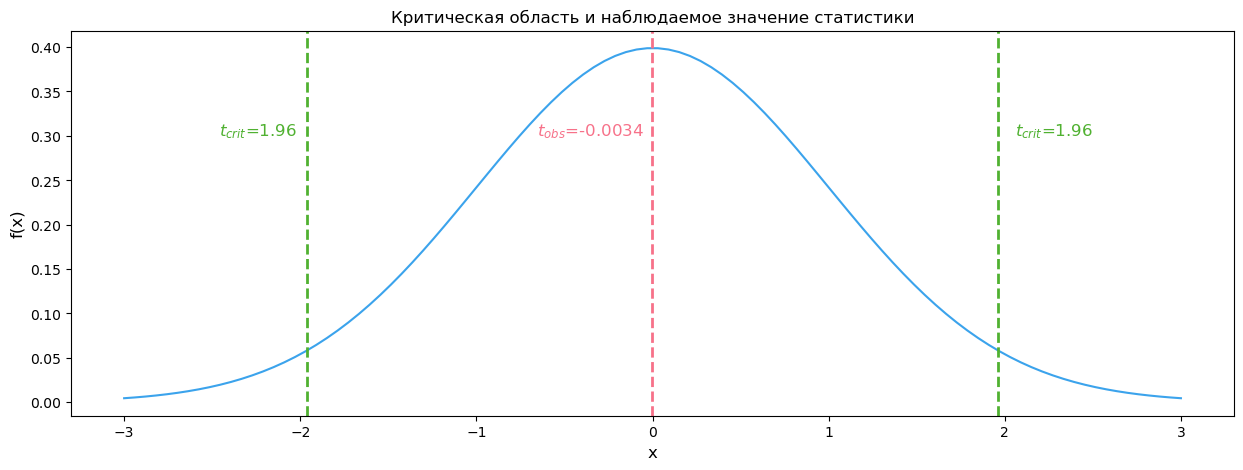

In [7]:
pal = sns.color_palette('husl', 3)

fig, ax = plt.subplots(figsize = (15, 5))

plt.title('Критическая область и наблюдаемое значение статистики')

x = np.linspace(-3, 3, 100)
ax.plot(x, stats.t.pdf(x, df=n_im_open+n_im_close-2), color=pal[2])
plt.ylabel('f(x)', fontsize=12)
plt.xlabel('x', fontsize=12)

plt.axvline(t_stat_im, color=pal[0], linestyle="--", lw=2)
plt.axvline(t_crit_1, color=pal[1], linestyle="--", lw=2)
plt.axvline(t_crit_2, color=pal[1], linestyle="--", lw=2)

crit = '$t_{crit}$'
obs = '$t_{obs}$'
plt.text(t_crit_2 - 0.5, 0.3, f'{crit}={round(t_crit_1,2)}', color=pal[1], fontsize=12)
plt.text(t_crit_1 + 0.1, 0.3,  f'{crit}={round(t_crit_1,2)}', color=pal[1], fontsize=12)
plt.text(t_stat_im - 0.65, 0.3, f'{obs}={round(t_stat_im,4)}', color=pal[0], fontsize=12);

> Из графика можем видеть, что полученная статистика не попадает в критическую область при выбранном нами уровне значимости (и при любом разумном уровне), а следовательно нулевая гипотеза не отвергается, то есть, разница между ценой открытия и закрытия IMOEX действительно статистически незначима